Epoch 1/300
20/20 [==============================] - 1s 14ms/step - loss: 12.9830 - mape: 95.2918 - val_loss: 11.9707 - val_mape: 92.6717
Epoch 2/300
20/20 [==============================] - 0s 3ms/step - loss: 12.0012 - mape: 90.5718 - val_loss: 11.0628 - val_mape: 87.9964
Epoch 3/300
20/20 [==============================] - 0s 3ms/step - loss: 11.1020 - mape: 85.9883 - val_loss: 10.2022 - val_mape: 83.5320
Epoch 4/300
20/20 [==============================] - 0s 3ms/step - loss: 10.2463 - mape: 81.7534 - val_loss: 9.4196 - val_mape: 79.3660
Epoch 5/300
20/20 [==============================] - 0s 4ms/step - loss: 9.4719 - mape: 77.6617 - val_loss: 8.6982 - val_mape: 75.3365
Epoch 6/300
20/20 [==============================] - 0s 4ms/step - loss: 8.7599 - mape: 73.7112 - val_loss: 8.0398 - val_mape: 71.3941
Epoch 7/300
20/20 [==============================] - 0s 4ms/step - loss: 8.1012 - mape: 69.7645 - val_loss: 7.4145 - val_mape: 67.4419
Epoch 8/300
20/20 [============================

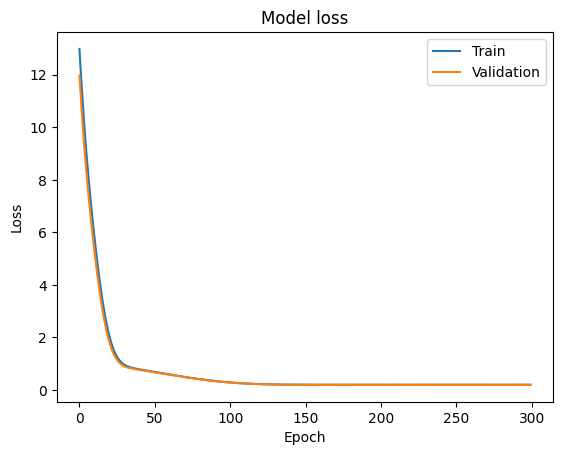

32/32 [==============================] - 0s 1ms/step


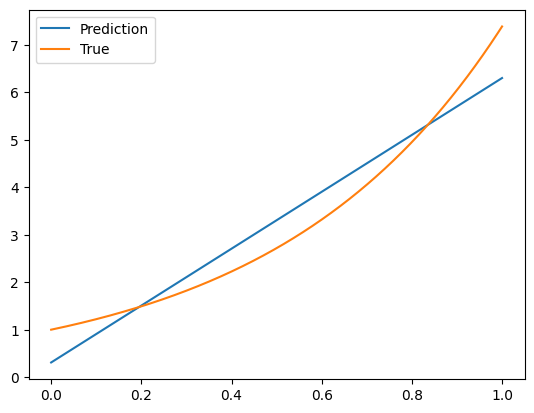

Optimal number of nodes: 56


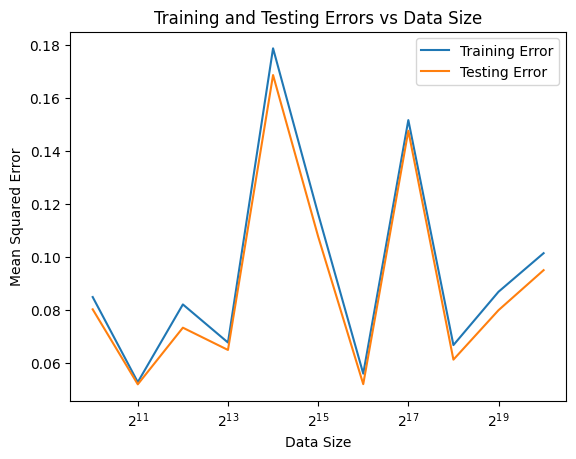

Epoch 1/300
20/20 [==============================] - 1s 12ms/step - loss: 7.4588 - mape: 60.9709 - val_loss: 1.8926 - val_mape: 21.1062 - lr: 0.0100
Epoch 2/300
20/20 [==============================] - 0s 4ms/step - loss: 1.1789 - mape: 37.3376 - val_loss: 0.9045 - val_mape: 37.5846 - lr: 0.0100
Epoch 3/300
20/20 [==============================] - 0s 4ms/step - loss: 0.6341 - mape: 23.3537 - val_loss: 0.4034 - val_mape: 17.1076 - lr: 0.0100
Epoch 4/300
20/20 [==============================] - 0s 4ms/step - loss: 0.2893 - mape: 13.9073 - val_loss: 0.2194 - val_mape: 13.9252 - lr: 0.0100
Epoch 5/300
20/20 [==============================] - 0s 4ms/step - loss: 0.2109 - mape: 12.9741 - val_loss: 0.1842 - val_mape: 11.1038 - lr: 0.0100
Epoch 6/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1778 - mape: 10.8899 - val_loss: 0.1636 - val_mape: 10.7777 - lr: 0.0100
Epoch 7/300
20/20 [==============================] - 0s 4ms/step - loss: 0.1601 - mape: 9.8511 - val_loss: 0.14

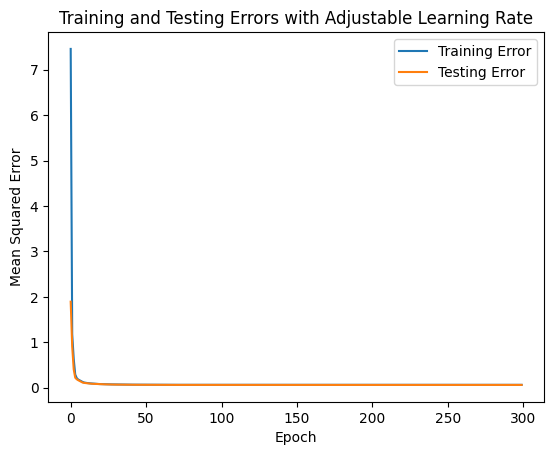

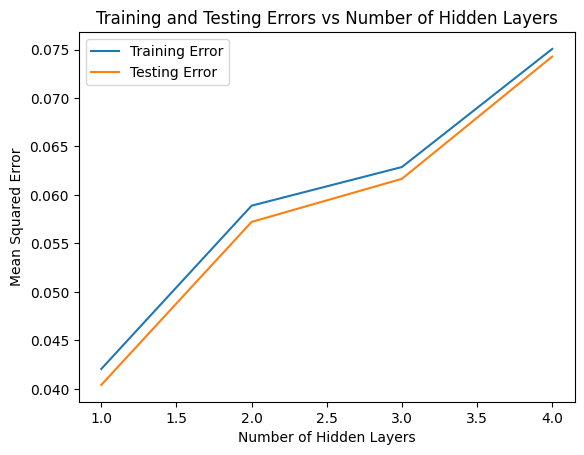

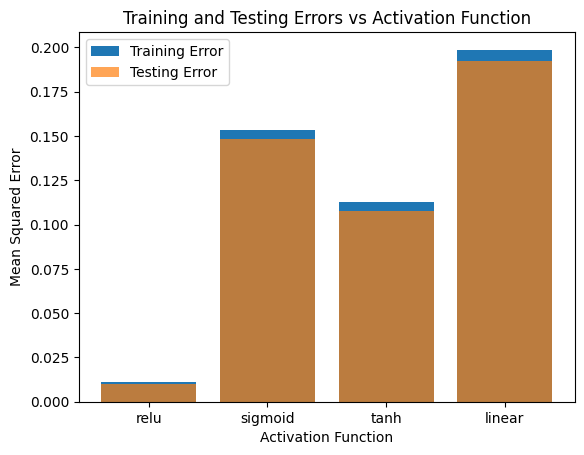

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Generating synthetic data
n = 1000
x = np.linspace(0, 1, n)
Y = np.exp(2 * x)  # Exponential function
noise = np.random.uniform(0, 0.2, n)  # Adding noise
Y_noise = Y + noise

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.2)

# Building a neural network model
model = Sequential([Dense(8, activation="relu", input_dim=1),Dense(1)])

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mape'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=40)

# Plotting training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluating model performance
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Visualizing predictions
plt.plot(x, model.predict(x))
plt.plot(x, Y)
plt.legend(['Prediction', 'True'])
plt.show()

# Function to build and train models with different configurations
def build_model(nodes):
    model = Sequential([
        Dense(nodes, activation="relu", input_dim=1),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mape'])
    return model

# Testing different node configurations
node_configs = [1, 2, 16, 30, 56]
training_errors = []
testing_errors = []

for nodes in node_configs:
    model = build_model(nodes)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=40, verbose=0)
    training_errors.append(history.history['loss'][-1])
    testing_errors.append(history.history['val_loss'][-1])

# Identifying optimal node configuration
optimal_nodes = node_configs[np.argmin(testing_errors)]
print(f"Optimal number of nodes: {optimal_nodes}")

# Visualizing training and testing errors with respect to data size
data_sizes = [2**i for i in range(10, 21)]
training_errors = []
testing_errors = []

for size in data_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(x[:size], Y_noise[:size], test_size=0.2)
    model = build_model(optimal_nodes)
    history = model.fit(X_train_subset, y_train_subset, validation_data=(X_test, y_test), epochs=100, batch_size=30, verbose=0)
    training_errors.append(history.history['loss'][-1])
    testing_errors.append(history.history['val_loss'][-1])

# Plotting training and testing errors against data size
plt.plot(data_sizes, training_errors, label='Training Error')
plt.plot(data_sizes, testing_errors, label='Testing Error')
plt.xscale('log', base=2)
plt.title('Training and Testing Errors vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Building a regularized model
def build_regularized_model():
    model = Sequential([
        Dense(45, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_dim=1),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mape'])
    return model

# Defining a learning rate scheduling function
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the regularized model with learning rate scheduling
regularized_model = build_regularized_model()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay)
history_regularized = regularized_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                            epochs=300, batch_size=40, callbacks=[lr_schedule])

# Plotting training and testing errors with adjustable learning rate
plt.plot(history_regularized.history['loss'], label='Training Error')
plt.plot(history_regularized.history['val_loss'], label='Testing Error')
plt.title('Training and Testing Errors with Adjustable Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Building models with varying number of hidden layers
def build_model(num_layers):
    model = Sequential()
    model.add(Dense(45, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_dim=1))
    for _ in range(num_layers - 1):
        model.add(Dense(45, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mape'])
    return model

# Testing different numbers of hidden layers
num_layers_list = [1, 2, 3, 4]
training_errors = []
testing_errors = []

for num_layers in num_layers_list:
    model = build_model(num_layers)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=40, verbose=0)
    training_errors.append(history.history['loss'][-1])
    testing_errors.append(history.history['val_loss'][-1])

# Plotting training and testing errors with respect to number of hidden layers
plt.plot(num_layers_list, training_errors, label='Training Error')
plt.plot(num_layers_list, testing_errors, label='Testing Error')
plt.title('Training and Testing Errors vs Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Building models with different activation functions
def build_model(activation):
    model = Sequential([
        Dense(32, activation=activation, input_dim=1),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mape'])
    return model

# Testing different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh', 'linear']
training_errors = []
testing_errors = []

for activation in activation_functions:
    model = build_model(activation)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=40, verbose=0)
    training_errors.append(history.history['loss'][-1])
    testing_errors.append(history.history['val_loss'][-1])

# Plotting training and testing errors with respect to activation function
plt.bar(activation_functions, training_errors, label='Training Error')
plt.bar(activation_functions, testing_errors, label='Testing Error', alpha=0.7)
plt.title('Training and Testing Errors vs Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
